Raw dataset shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


✅ Saved file: data\dataset_benin_clean.csv
Cleaned dataset shape: (525600, 19)


,timestamp,ghi,dni,dhi,moda,modb,tamb,rh,ws,wsgust,wsstdev,wd,wdstdev,bp,cleaning,precipitation,tmoda,tmodb,comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN



                                 EDA FOR BENIN                                  

                               SUMMARY STATISTICS                               
                 ghi            dni            dhi           moda  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.342811     167.187516     110.906983     236.524528   
std       330.868308     261.710501     152.916844     326.815176   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       482.900000     314.200000     210.500000     463.600000   
max      1233.000000     952.300000     591.400000    1215.000000   

                modb           tamb             rh             ws  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.737160      28.179683      54.487969       2.082432   
std    

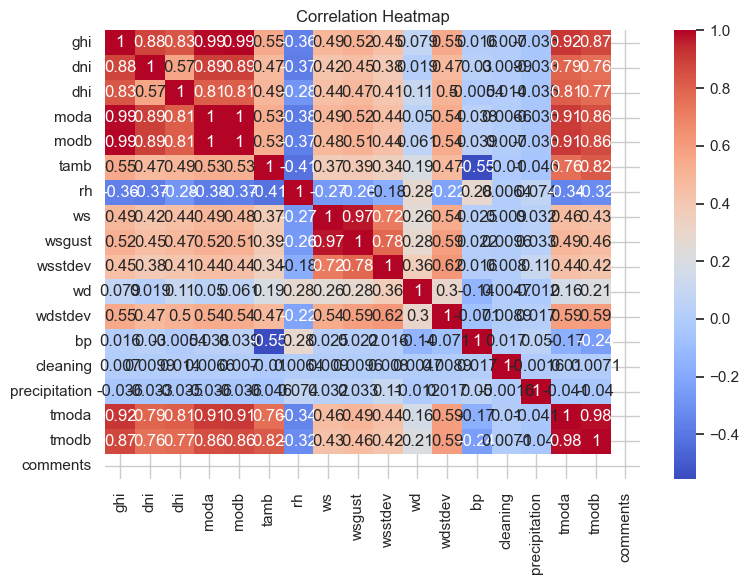

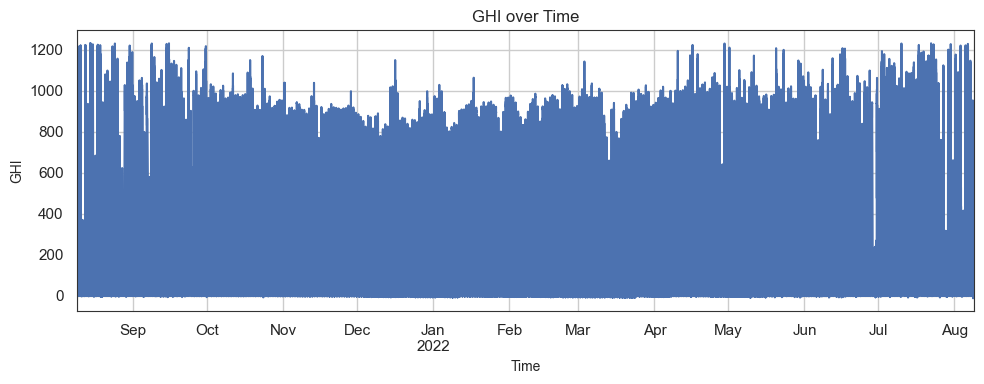

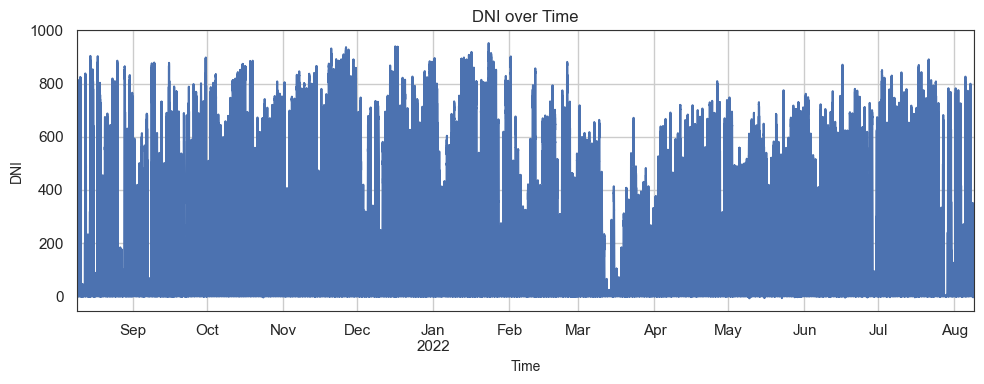

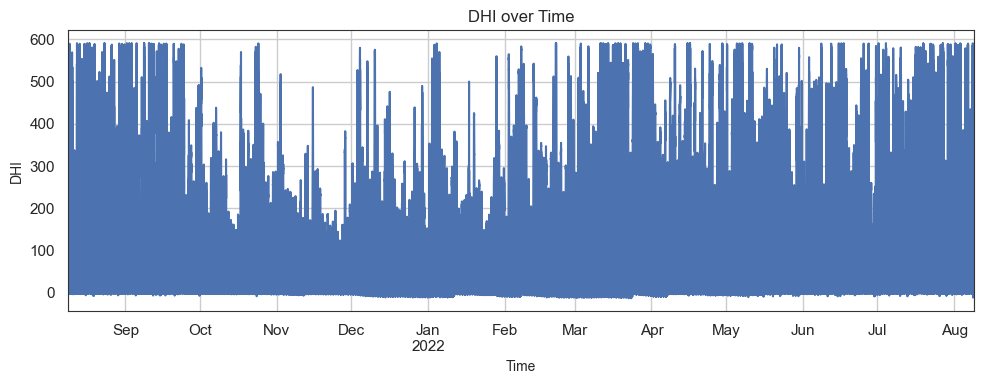

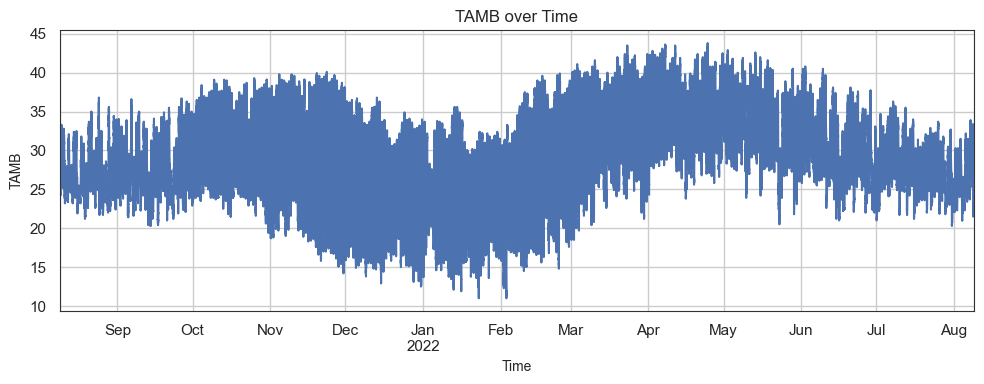

d:\Python\Week_01\Assignment\solar-challenge-week0\Myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


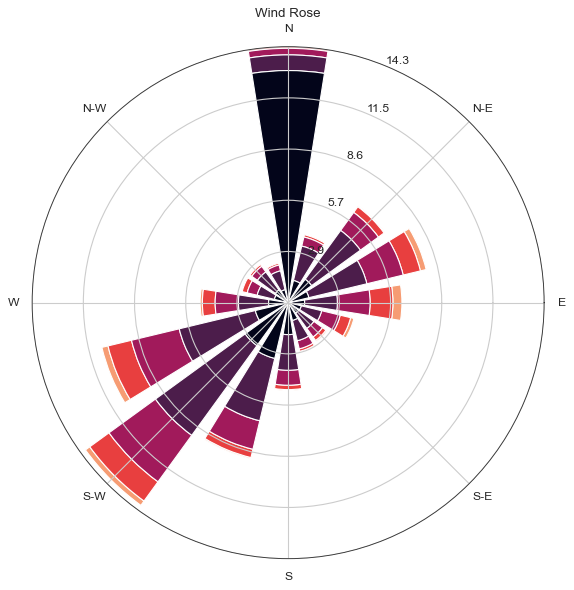

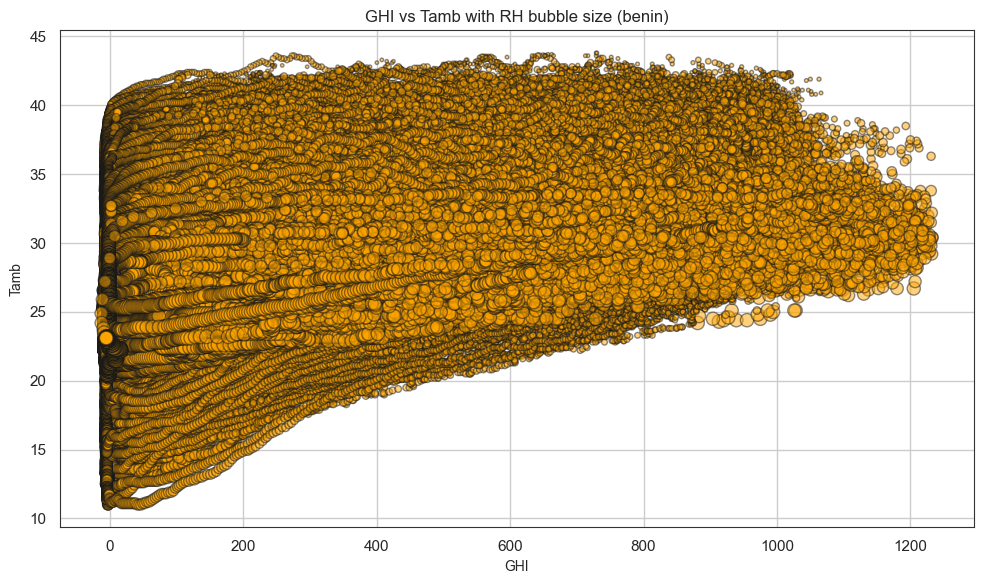

In [1]:
# ------------------------------
# EDA Template Notebook
# ------------------------------

# 1️⃣ Setup imports and repo path
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Add repo root to sys.path so 'src' can be imported
repo_root = Path(r"D:\Python\Week_01\Assignment\solar-challenge-week0")
if str(repo_root) not in sys.path:
    sys.path.append(str(repo_root))

# Now imports from src will work
from src.data_loader import load_country_data
from src.preprocess import preprocess_dataset
from src.analyze import run_full_analysis

# ------------------------------
# 2️⃣ Set dataset and country
# ------------------------------
# Change these for each country
FILENAME = "benin-malanville.csv"  # raw CSV file name
COUNTRY_NAME = "benin"
TIMESTAMP_COL = "timestamp"  # adjust if your CSV column differs

# ------------------------------
# 3️⃣ Load raw dataset
# ------------------------------
df_raw = load_country_data(FILENAME)
print(f"Raw dataset shape: {df_raw.shape}")
display(df_raw.head())

# ------------------------------
# 4️⃣ Preprocess dataset
# ------------------------------
df_clean = preprocess_dataset(df_raw, country=COUNTRY_NAME)
print(f"Cleaned dataset shape: {df_clean.shape}")
display(df_clean.head())

# ------------------------------
# 5️⃣ Run full EDA/Analysis
# ------------------------------
run_full_analysis(df_clean, country=COUNTRY_NAME, timestamp_col=TIMESTAMP_COL)

# ------------------------------
# 6️⃣ Optional: Bubble Chart
# ------------------------------
# GHI vs Tamb with RH as bubble size
if all(col in df_clean.columns for col in ["ghi", "tamb", "rh"]):
    plt.figure(figsize=(10, 6))
    plt.scatter(df_clean["ghi"], df_clean["tamb"], s=df_clean["rh"], alpha=0.5,
                c="orange", edgecolors="k")
    plt.xlabel("GHI")
    plt.ylabel("Tamb")
    plt.title(f"GHI vs Tamb with RH bubble size ({COUNTRY_NAME})")
    plt.show()
